In [1]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

In [2]:
line = xt.Line.from_json('../templates/PIMMStutorials_CNAOlattice/cnao_lattice_00_optics.json')
line.build_tracker()

Loading line from dict:   0%|          | 0/429 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
line.particle_ref = xt.Particles(q0=1, mass0=xt.PROTON_MASS_EV, kinetic_energy0=200e6)

In [4]:
# Twiss
tw = line.twiss(method='4d')

In [5]:
# Inspect tunes and chromaticities
print(f"Horizontal tume is: {tw.qx}") # Horizontal tune
print(f"Vertical tune is: {tw.qy}") # Vertical tune
print(f"Horizontal chromaticity is: {tw.dqx}") # Horizontal chromaticity
print(f"Vertical chromaticity is: {tw.dqy}") # Vertical chromaticity

Horizontal tume is: 1.664000002378304
Vertical tune is: 1.4631947412133146
Horizontal chromaticity is: -1.0000016529643219
Vertical chromaticity is: -0.9999999837995155


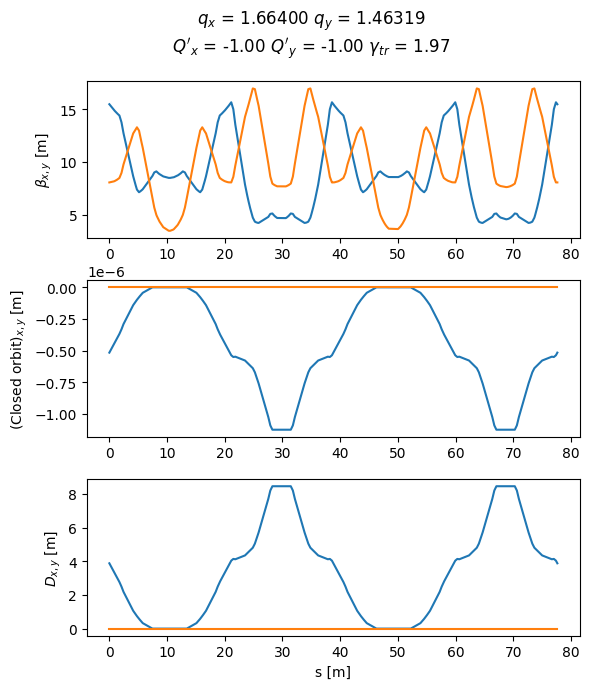

In [6]:
plt.close('all')

fig1 = plt.figure(1, figsize=(6.4, 4.8*1.5))
spbet = plt.subplot(3,1,1)
spco = plt.subplot(3,1,2, sharex=spbet)
spdisp = plt.subplot(3,1,3, sharex=spbet)

spbet.plot(tw.s, tw.betx)
spbet.plot(tw.s, tw.bety)
spbet.set_ylabel(r'$\beta_{x,y}$ [m]')

spco.plot(tw.s, tw.x)
spco.plot(tw.s, tw.y)
spco.set_ylabel(r'(Closed orbit)$_{x,y}$ [m]')

spdisp.plot(tw.s, tw.dx)
spdisp.plot(tw.s, tw.dy)
spdisp.set_ylabel(r'$D_{x,y}$ [m]')
spdisp.set_xlabel('s [m]')

fig1.suptitle(
    r'$q_x$ = ' f'{tw.qx:.5f}' r' $q_y$ = ' f'{tw.qy:.5f}' '\n'
    r"$Q'_x$ = " f'{tw.dqx:.2f}' r" $Q'_y$ = " f'{tw.dqy:.2f}'
    r' $\gamma_{tr}$ = '  f'{1/np.sqrt(tw.momentum_compaction_factor):.2f}'
)

fig1.subplots_adjust(left=.15, right=.92, hspace=.27)
plt.show()

## Inspecting twiss output

In [7]:
tw.show()

name                             s             x            px             y            py ...
cnao3s0$start                    0    -5.148e-07   8.45853e-08   2.78491e-25  -8.82744e-27
septum_aperture                  0    -5.148e-07   8.45853e-08   2.78491e-25  -8.82744e-27
se_010a_esp                      0    -5.148e-07   8.45853e-08   2.78491e-25  -8.82744e-27
se_011a_dri                    0.8  -4.47132e-07   8.45853e-08   2.71429e-25  -8.82744e-27
se_012a_fls                  0.955  -4.34021e-07   8.45853e-08   2.70061e-25  -8.82744e-27
se_013a_puh                  0.955  -4.34021e-07   8.45853e-08   2.70061e-25  -8.82744e-27
se_014a_fls                  1.255  -4.08646e-07   8.45853e-08   2.67412e-25  -8.82744e-27
se_015a_dri                  1.255  -4.08646e-07   8.45853e-08   2.67412e-25  -8.82744e-27
drift_se_016a_csh..1         1.334  -4.01963e-07   8.45853e-08   2.66715e-25  -8.82744e-27
se_016a_csh                   1.48  -3.89614e-07   8.45853e-08   2.65426e-25  -8.82744

In [8]:
tw['qx'] #same as tw.qx

np.float64(1.664000002378304)

In [9]:
# Access to a single column of the table
tw['betx'] # is an array with the horizontal beta function at all elements

array([15.49549186, 15.49549186, 15.49549186, 14.94895196, 14.85392716,
       14.85392716, 14.68002938, 14.68002938, 14.63643443, 14.55827823,
       14.55827823, 14.48325188, 14.42441541, 13.77845929, 13.77845929,
       13.35749867, 13.35749867, 12.73886281, 12.73886281,  8.65929101,
        8.65929101,  8.22883251,  8.22883251,  8.056904  ,  7.81441824,
        7.81441824,  7.57963934,  7.39879236,  7.14421593,  7.14421593,
        7.19513863,  7.19513863,  7.32403095,  7.32403095,  7.42977756,
        7.42977756,  8.68684946,  8.90436878,  8.90436878,  9.02220507,
        9.12362573,  9.12362573,  9.07031277,  9.07031277,  8.92610322,
        8.92610322,  8.89937001,  8.89937001,  8.87559849,  8.87559849,
        8.86193562,  8.64502164,  8.5072613 ,  8.50428859,  8.50428859,
        8.50537229,  8.54948942,  8.54948942,  8.57043181,  8.71859245,
        8.76011564,  8.76011564,  8.87476373,  8.87476373,  8.94183768,
        9.01057761,  9.01057761,  9.08433054,  9.12362649,  9.02

In [10]:
# Access to a single element of the table of a vector quantity
tw['betx', 'se_016a_csh']

np.float64(14.558278230429924)

In [11]:
# Regular expressions can be used to select elements by name
tw.rows['se_02.*']

TwissTable: 4 rows, 62 cols
name                    s             x            px             y            py          zeta ...
se_020a_dri         2.105  -3.30701e-07   1.17604e-07   2.64372e-25   1.59868e-26  -8.06605e-15
se_021a_fls         2.244  -3.14354e-07   1.17604e-07   2.66594e-25   1.59868e-26  -9.02284e-15
se_022a_dri         2.244  -3.14354e-07   1.17604e-07   2.66594e-25   1.59868e-26  -9.02284e-15
se_022b_sip       2.45415  -2.89639e-07   1.17604e-07   2.69954e-25   1.59868e-26  -1.04694e-14

In [12]:
# A section of the ring can be selected using names
tw.rows['drift_sf_005a_csv..2':'s0_018a_dri']

TwissTable: 28 rows, 62 cols
name                             s             x            px             y            py ...
drift_sf_005a_csv..2       4.55451  -1.13036e-07   6.48967e-08   2.71692e-25  -9.42513e-27
sf_006a_dri                4.68051  -1.04859e-07   6.48967e-08   2.70504e-25  -9.42513e-27
sf_007a_qus                4.78051  -9.83695e-08   6.48967e-08   2.69562e-25  -9.42513e-27
sf_008a_bs1                5.14051  -7.72887e-08   5.27077e-08   2.59463e-25  -4.64429e-26
sf_009a_dri                5.14051  -7.72887e-08   5.27077e-08   2.59463e-25  -4.64429e-26
sf_010a_fls                5.27951  -6.99624e-08   5.27077e-08   2.53008e-25  -4.64429e-26
sf_011a_puv                5.27951  -6.99624e-08   5.27077e-08   2.53008e-25  -4.64429e-26
sf_012a_fls                5.57951  -5.41501e-08   5.27077e-08   2.39075e-25  -4.64429e-26
sf_013a_dri                5.57951  -5.41501e-08   5.27077e-08   2.39075e-25  -4.64429e-26
sf_013b_sip                5.78966  -4.30734e-08   5.2707

In [13]:
# A section of the ring can be selected using the s coordinate
tw.rows[20:22:'s']

TwissTable: 14 rows, 62 cols
name                    s             x            px             y            py          zeta ...
s2_014a_fls        20.048  -4.44256e-07  -8.45853e-08  -2.90205e-25   2.77674e-27  -4.08763e-07
s2_015a_fct        20.048  -4.44256e-07  -8.45853e-08  -2.90205e-25   2.77674e-27  -4.08763e-07
s2_016a_bs1        20.448   -4.7809e-07  -8.45853e-08  -2.89095e-25   2.77674e-27  -4.08763e-07
s2_017a_fls        20.448   -4.7809e-07  -8.45853e-08  -2.89095e-25   2.77674e-27  -4.08763e-07
s2_018a_dri        20.448   -4.7809e-07  -8.45853e-08  -2.89095e-25   2.77674e-27  -4.08763e-07
s2_019a_sxc        20.702  -4.99575e-07  -8.45853e-08  -2.88389e-25   2.77674e-27  -4.08763e-07
s2_020a_dri        20.962  -5.21567e-07  -8.45853e-08  -2.87667e-25   2.77674e-27  -4.08763e-07
s2_021a_qus        21.127  -5.35523e-07  -8.45853e-08  -2.87209e-25   2.77674e-27  -4.08763e-07
s2_022a_bs1        21.487   -5.4941e-07   7.82786e-09  -2.95006e-25  -4.63138e-26  -4.08763e-07
s2_023a

In [14]:
# Columns can be selected as well (and defined on the fly with simple mathematical
# expressions)
tw.cols['betx dx/sqrt(betx)']

TwissTable: 430 rows, 3 cols
name                          betx dx/sqrt(betx)
cnao3s0$start              15.4955      0.987085
septum_aperture            15.4955      0.987085
se_010a_esp                15.4955      0.987085
se_011a_dri                 14.949      0.872868
se_012a_fls                14.8539       0.84998
se_013a_puh                14.8539       0.84998
se_014a_fls                  14.68      0.805011
se_015a_dri                  14.68      0.805011
drift_se_016a_csh..1       14.6364      0.793026
se_016a_csh                14.5583      0.770722
...
se_002a_dri       13.5444       1.12116
se_003a_fls       14.4227       1.08976
se_004a_dri       14.4227       1.08976
se_005a_qus       15.0222       1.06991
se_006a_bs1       15.6817       1.02071
se_007a_dri       15.6817       1.02071
se_008a_fls       15.5704       1.00089
se_009a_dri       15.5704       1.00089
cnao3s0$end       15.4955      0.987085
_end_point        15.4955      0.987085